<a href="https://colab.research.google.com/github/codebuzer/Bioactivity-Prediction-App/blob/main/CDD_5_sars_cov_3c_proteinase_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Major Project - [Part 5] Comparing Regressors**

Md Abuzar Khan

['codebuzer' github](https://github.com/codebuzer)

In this Jupyter notebook, I will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, I will be comparing several ML algorithms for build regression models of **SARS COV 3c proteinase** inhibitors.



## **1. Import libraries**



**What is Lazy Predict?**
It is one of the best python libraries that helps you to semi-automate your Machine Learning Task. It builds a lot of basic models without much code and helps understand which models work better without any parameter tuning.

Suppose we have a problem statement and we really need to apply all the models on that particular dataset and we have to analyze that how our basic model is performing. Here basic model means “Model without parameters”. So we can do this task directly using Lazy Predict. After getting all accuracy we can choose the top 5 models and then apply hyperparameter tuning to them. It provides a Lazy Classifier to solve the classification problem and Lazy Regressor to solve the regression problem.

In [2]:
! pip install lazypredict

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
df = pd.read_csv('sars_cov_3c_protein_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [11]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [12]:
# Examine X dimension
X.shape

(133, 881)

In [13]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(133, 200)

In [14]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [15]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 67832.41it/s]


In [16]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,80944687596699990396860009795476197212276808500...,-7323566973034760820519311084701947189051634964...,1503098996482623418985147899723887202541764608.00,0.24
KernelRidge,7.39,-4.78,4.22,0.06
PassiveAggressiveRegressor,2.12,-0.01,1.77,0.03
LassoLars,2.11,0.00,1.76,0.05
DummyRegressor,2.11,0.00,1.76,0.02
Lasso,1.95,0.14,1.63,0.04
ElasticNet,1.68,0.38,1.38,0.03
LassoLarsIC,1.67,0.39,1.37,0.05
LarsCV,1.56,0.49,1.25,0.49


In [17]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


## **5. Data visualization of model performance**

[(0.0, 1.0)]

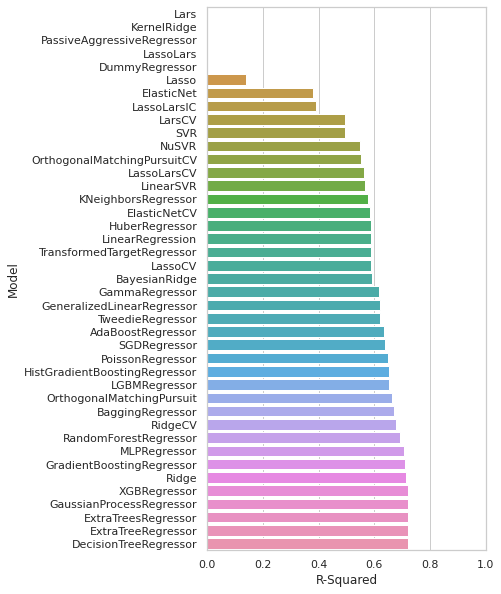

In [18]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

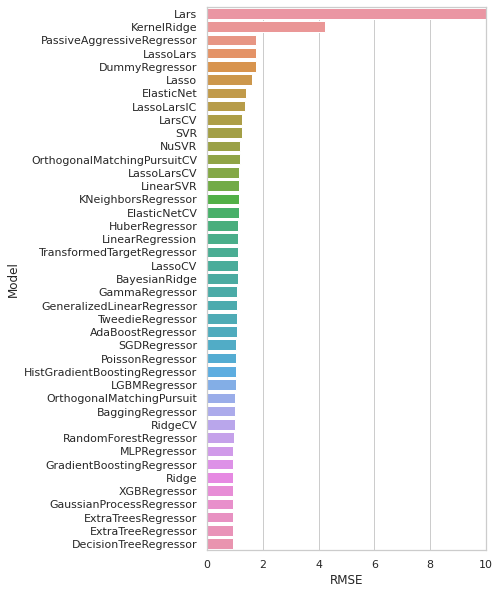

In [20]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

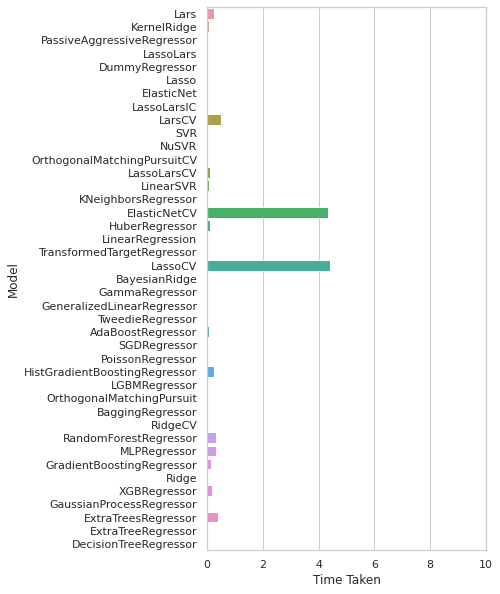

In [19]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))